# Data Wrangling Template

## Gather

In [1]:
#importing zipfile to access downloaded zip content of file
import zipfile

In [2]:
# unzipping the file in the read only mode
with zipfile.ZipFile('archive.zip', 'r') as myzip:
    myzip.extractall()

In [3]:
import pandas as pd
df = pd.read_csv('online-job-postings.csv')

In [4]:
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

## Assess

1. Missing Values
2. Start Date Inconsistencies
3. Non-descriptive Column Headers

Insummary: 
- Missing values (NaN)
- StartDate inconsistencies (ASAP)
- Nondescriptive column headers (ApplicationP, AboutC, RequiredQual ... and also JobRequirment)

## Clean

#### Define

Nondescriptive column headers (ApplicationP, AboutC, RequiredQual ... and also JobRequirment)

#### Code

In [6]:
df_clean = df.copy()

In [7]:
df_clean = df_clean.rename(columns={'ApplicationP': 'ApplicationProcedure',
                                    'AboutC': 'AboutCompany',
                                    'RequiredQual': 'RequiredQualifications',
                                   'JobRequirment': 'JobRequirement' })

#### Test

In [8]:
df_clean.head(1)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationProcedure,OpeningDate,Deadline,Notes,AboutCompany,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False


#### Define

StartDate Inconsistencies
- ASAP
- As soon as Possible
- Immediately

#### Code

In [9]:
df_clean.StartDate.value_counts()

ASAP                              4754
Immediately                        773
As soon as possible                543
Upon hiring                        261
Immediate                          259
                                  ... 
Flexible                             1
11 April 2010                        1
ASAP starting 10 February 2006       1
07 April 2010                        1
15 March 2009                        1
Name: StartDate, Length: 1186, dtype: int64

In [10]:
asap_list = ['Immediately', 'As soon as possible', 'Upon hiring',
             'Immediate', 'Immediate employment', 'As soon as possible.', 'Immediate job opportunity',
             '"Immediate employment, after passing the interview."',
             'ASAP preferred', 'Employment contract signature date',
             'Immediate employment opportunity', 'Immidiately', 'ASA',
             'Asap', '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
             'Immediately upon agreement', '20 November 2014 or ASAP',
             'immediately', 'Immediatelly',
             '"Immediately upon selection or no later than November 15, 2009."',
             'Immediate job opening', 'Immediate hiring', 'Upon selection',
             'As soon as practical', 'Immadiate', 'As soon as posible',
             'Immediately with 2 months probation period',
             '12 November 2012 or ASAP', 'Immediate employment after passing the interview',
             'Immediately/ upon agreement', '01 September 2014 or ASAP',
             'Immediately or as per agreement', 'as soon as possible',
             'As soon as Possible', 'in the nearest future', 'immediate',
             '01 April 2014 or ASAP', 'Immidiatly', 'Urgent',
             'Immediate or earliest possible', 'Immediate hire',
             'Earliest  possible', 'ASAP with 3 months probation period.',
             'Immediate employment opportunity.', 'Immediate employment.',
             'Immidietly', 'Imminent', 'September 2014 or ASAP', 'Imediately']


In [11]:
# .replace works on a pandas series 
# hence here df_clean.StartDate is our series
for phrase in asap_list:
    df_clean.StartDate.replace( phrase , "ASAP", inplace=True)


In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   jobpost                 19001 non-null  object
 1   date                    19001 non-null  object
 2   Title                   18973 non-null  object
 3   Company                 18994 non-null  object
 4   AnnouncementCode        1208 non-null   object
 5   Term                    7676 non-null   object
 6   Eligibility             4930 non-null   object
 7   Audience                640 non-null    object
 8   StartDate               9675 non-null   object
 9   Duration                10798 non-null  object
 10  Location                18969 non-null  object
 11  JobDescription          15109 non-null  object
 12  JobRequirement          16479 non-null  object
 13  RequiredQualifications  18517 non-null  object
 14  Salary                  9622 non-null   object
 15  Ap

In [13]:
df_clean.StartDate.value_counts()

ASAP                 6856
01 September 2012      31
March 2006             27
November 2006          22
January 2010           19
                     ... 
Flexible                1
11 April 2010           1
3-21 July 2006          1
07 April 2010           1
25 March 2009           1
Name: StartDate, Length: 1140, dtype: int64

**_We can use assert statement to check if our cleaning has occured_**

In [14]:
for phrase in asap_list:
    assert phrase not in df_clean.StartDate.values

## Questions

1. What is the percentage of work that want people to start as soon as possible?

In [15]:
asap_counts = df_clean.StartDate.value_counts()['ASAP']
total_counts = df_clean.StartDate.count()
Percentage_ASAP = asap_counts * 100 / total_counts
print("Percentage of work that need people to start as soon as possible is: ", Percentage_ASAP)

Percentage of work that need people to start as soon as possible is:  70.86304909560724


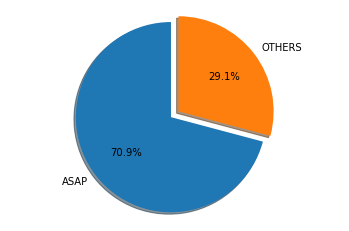

In [16]:
#ploting a pie chart to display this insight
# first import modules needed for this chart

import matplotlib.pyplot as plt
%matplotlib inline
labels = 'ASAP', 'OTHERS'
sizes = [asap_counts, total_counts-asap_counts]
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'asap_counts')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Findings

**70.9%** of _employment opportunities_ **require** that workers are immediately availiable for employment
 

## Questions

2. What is the percentage of work that want people to start as soon as possible? 

In [17]:
df_clean.Duration.describe()

count         10798
unique         1515
top       Long term
freq           3458
Name: Duration, dtype: object

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   jobpost                 19001 non-null  object
 1   date                    19001 non-null  object
 2   Title                   18973 non-null  object
 3   Company                 18994 non-null  object
 4   AnnouncementCode        1208 non-null   object
 5   Term                    7676 non-null   object
 6   Eligibility             4930 non-null   object
 7   Audience                640 non-null    object
 8   StartDate               9675 non-null   object
 9   Duration                10798 non-null  object
 10  Location                18969 non-null  object
 11  JobDescription          15109 non-null  object
 12  JobRequirement          16479 non-null  object
 13  RequiredQualifications  18517 non-null  object
 14  Salary                  9622 non-null   object
 15  Ap

In [19]:
df_clean.drop(['Eligibility', 'Notes', 'Attach', 'Audience', 'Term', 'AnnouncementCode'], axis=1, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   jobpost                 19001 non-null  object
 1   date                    19001 non-null  object
 2   Title                   18973 non-null  object
 3   Company                 18994 non-null  object
 4   StartDate               9675 non-null   object
 5   Duration                10798 non-null  object
 6   Location                18969 non-null  object
 7   JobDescription          15109 non-null  object
 8   JobRequirement          16479 non-null  object
 9   RequiredQualifications  18517 non-null  object
 10  Salary                  9622 non-null   object
 11  ApplicationProcedure    18941 non-null  object
 12  OpeningDate             18295 non-null  object
 13  Deadline                18936 non-null  object
 14  AboutCompany            12470 non-null  object
 15  Ye

In [22]:
df1=df_clean.copy()

In [23]:
df1.dropna(axis=0, inplace=True)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117 entries, 320 to 18995
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   jobpost                 3117 non-null   object
 1   date                    3117 non-null   object
 2   Title                   3117 non-null   object
 3   Company                 3117 non-null   object
 4   StartDate               3117 non-null   object
 5   Duration                3117 non-null   object
 6   Location                3117 non-null   object
 7   JobDescription          3117 non-null   object
 8   JobRequirement          3117 non-null   object
 9   RequiredQualifications  3117 non-null   object
 10  Salary                  3117 non-null   object
 11  ApplicationProcedure    3117 non-null   object
 12  OpeningDate             3117 non-null   object
 13  Deadline                3117 non-null   object
 14  AboutCompany            3117 non-null   object
 15  Y

In [25]:
df1.head(6)

,jobpost,date,Title,Company,StartDate,Duration,Location,JobDescription,JobRequirement,RequiredQualifications,Salary,ApplicationProcedure,OpeningDate,Deadline,AboutCompany,Year,Month,IT
320,Training and Development Ltd.\r\nTITLE: Train...,Jun 7 10:38 PM,Training Manager,Training and Development Ltd.,01 July 2004,Continuos,"Yerevan, Armenia",Assist Training Coordinator in performing a\r\...,- Create and distribute marketing materials to...,- Demonstrated experience creating presentatio...,salary offer will be commensurate with educati...,please send your cover letter and resume via\r...,01 July 2001,21 June 2004,"Established in 2001, the TRAINING & DEVELOPMEN...",2004,6,False
467,Lycos Armenia CJSC\r\nTITLE: JSP/Java Develop...,"Jul 28, 2004",JSP/Java Developer for Lycos Mail,Lycos Armenia CJSC,ASAP,Permanent,"Yerevan, Armenia",The role requires dedicated JSP/Java professio...,The key elements of the role are full life cyc...,- Technically the key skills are Web based tec...,Attractive,Please send your CV to info@....\r\nYou can al...,29 July 2004,31 August 2004,Lycos Europe is one of the leading European In...,2004,7,True
468,Lycos Armenia CJSC\r\nTITLE: Java/C++ Develop...,"Jul 28, 2004",Java/C++ Developer for Lycos Mail,Lycos Armenia CJSC,ASAP,Permanent,"Yerevan, Armenia",The role requires dedicated Java/C++ professio...,The key elements of the role are full life cyc...,- Technically the key skill requirements are J...,Attractive,Please send your CV to info@....\r\nYou can al...,29 July 2004,31 August 2004,Lycos Europe is one of the leading European In...,2004,7,True
471,Lycos Europe\r\nTITLE: Java/C++ Developer for...,"Jul 29, 2004",Java/C++ Developer for Lycos Communities,Lycos Europe,ASAP,Permanent,"Yerevan, Armenia",The role requires dedicated Java/C++ professio...,The key elements of the role are full life cyc...,- Technically the key skill requirements are J...,Attractive,Please send your CV to info@....\r\nYou can al...,29 July 2004,31 August 2004,Lycos Europe is one of the leading European In...,2004,7,True
472,Lycos Europe\r\nTITLE: JSP/Java Developer for...,"Jul 29, 2004",JSP/Java Developer for Lycos Chat,Lycos Europe,ASAP,Permanent,"Yerevan, Armenia",The role requires dedicated web developer\r\np...,The key elements of the role are full life cyc...,- Technically the key skills are Web based tec...,Attractive,Please send your CV to info@....\r\nYou can al...,29 July 2004,31 August 2004,Lycos Europe is one of the leading European In...,2004,7,True
510,Lycos Europe\r\nTITLE: JSP/Java Developer for...,"Aug 13, 2004",JSP/Java Developer for Lycos Billing Platform,Lycos Europe,ASAP,Permanent,"Yerevan, Armenia",The role requires dedicated web developer\r\np...,The key elements of the role are full life cyc...,- Technically the key skills are Web based tec...,Attractive,Please send your CV to info@....\r\nYou can al...,29 July 2004,31 August 2004,Lycos Europe is one of the leading European In...,2004,8,True


In [27]:
df1.describe(include='all')

,jobpost,date,Title,Company,StartDate,Duration,Location,JobDescription,JobRequirement,RequiredQualifications,Salary,ApplicationProcedure,OpeningDate,Deadline,AboutCompany,Year,Month,IT
count,3117,3117,3117,3117,3117,3117,3117,3117,3117,3117,3117,3117,3117,3117,3117,3117.000000,3117.000000,3117
unique,3104,1722,1615,956,402,403,67,2627,2577,2817,881,2198,1645,1724,1529,NaN,NaN,2
top,Synopsys Armenia CJSC\r\nTITLE: Software Engi...,"Jul 17, 2009",Accountant,Mentor Graphics Development Services CJSC,ASAP,Long term,"Yerevan, Armenia",EPAM Systems is actively looking for Java deve...,- Participate in application design;\r\n- Prov...,- Excellent oral and written communication ski...,Competitive,Please submit your CV through:http://amyhrs.me...,17 July 2009,03 August 2009,Mentor Graphics Development Services CJSC is a...,NaN,NaN,False
freq,2,19,43,124,2457,1011,2974,22,47,9,383,36,19,20,98,NaN,NaN,2066
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.600257,6.561116,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.074593,3.425327,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,4.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,7.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,9.000000,NaN


In [46]:
data=df1.Location.value_counts()
data

Yerevan, Armenia                       2974
Kapan, Armenia                           16
Abovyan, Armenia                          9
Vanadzor, Armenia                         7
Yerevan,  Armenia                         7
                                       ... 
Lori-Shirak, Armenia                      1
Ararat region, Armenia                    1
Yeghvard city, Kotayk marz, Armenia       1
Artashat, Armenia                         1
Etchmiadzin, Armenia                      1
Name: Location, Length: 67, dtype: int64

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [67]:
np.arange(1, 21)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [68]:
data.index[:20]

Index(['Yerevan, Armenia', 'Kapan, Armenia', 'Abovyan, Armenia',
       'Vanadzor, Armenia', 'Yerevan,  Armenia', 'Jermuk, Armenia', 'Armenia',
       'Gyumri, Armenia', 'Meghri, Armenia', 'Stepanakert, NKR',
       'Tavush Marz and Yerevan, Armenia', 'Minsk, Republic of Belarus',
       'Sevan, Armenia', 'Gavar, Armenia', 'Echmiadzin, Armenia',
       'Klin, Russia', 'Ijevan, Armenia', 'Yerevan-Sevan highway, Armenia',
       'Tbilisi, Georgia', 'Tatev, Armenia'],
      dtype='object')

Text(0, 0.5, 'Location')

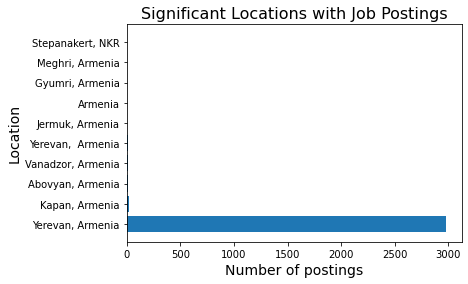

In [76]:
heights = data.values[:10]
locations = np.arange(1, 11)
labels = data.index[:10]
plt.barh(locations, heights, tick_label=labels)
plt.title("Significant Locations with Job Postings", fontsize=16)
plt.xlabel("Number of postings", fontsize=14)
plt.ylabel("Location", fontsize=14)